# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [132]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st
import seaborn as sns

In [133]:
data1 = pd.read_csv('datasets/geo_data_0.csv')
data2 = pd.read_csv('datasets/geo_data_1.csv')
data3 = pd.read_csv('datasets/geo_data_2.csv')

Исследуем корреляции

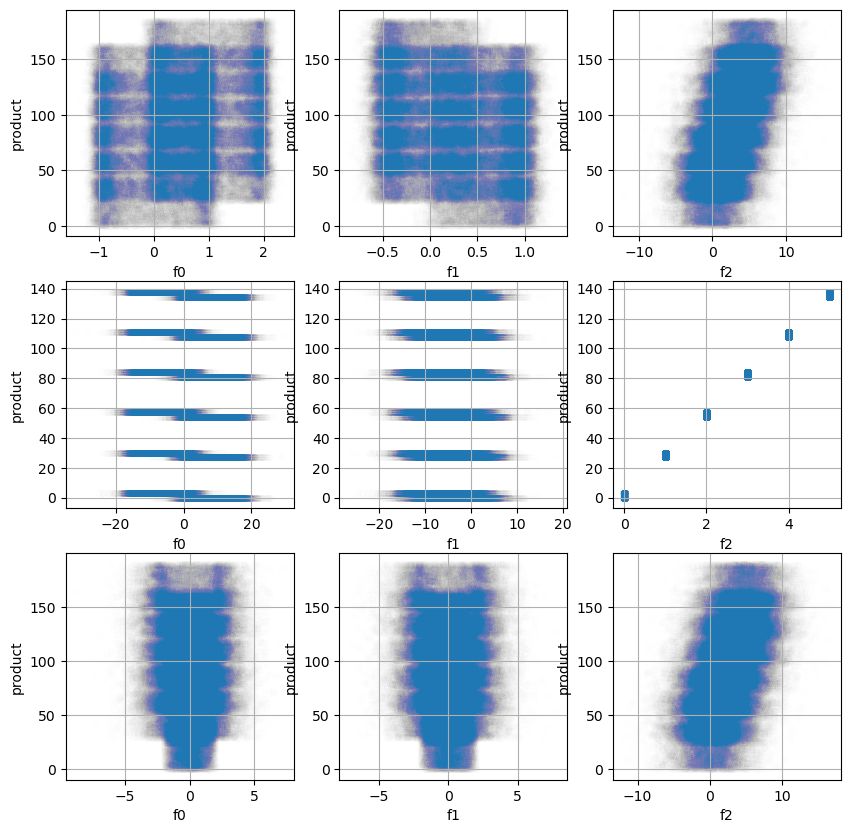

In [134]:
data_arr=[data1,data2,data3]
f, ax = plt.subplots(3, 3, figsize =(10,10))
for i in range(len(data_arr)):   
    data_arr[i].plot(x ='f0', y = 'product', kind = 'scatter', alpha=0.003, grid = True, ax=ax[i][0])
    data_arr[i].plot(x ='f1', y = 'product', kind = 'scatter', alpha=0.003, grid = True, ax=ax[i][1])
    data_arr[i].plot(x ='f2', y = 'product', kind = 'scatter', alpha=0.003, grid = True, ax=ax[i][2])

### деление выборок

In [135]:
features_one = data1.drop(['id','product'], axis=1)
target_one = data1['product']

features_train_one, features_valid_one, target_train_one, target_valid_one = train_test_split(
    features_one, target_one, train_size=0.75, random_state=12345) 

print('Размеры выборок: Обучающая -',round(features_train_one.shape[0]/data1.shape[0],2),', валидационная -', 
      round(features_valid_one.shape[0]/data1.shape[0],2))

Размеры выборок: Обучающая - 0.75 , валидационная - 0.25


In [136]:
features_two= data2.drop(['id','product'], axis=1)
target_two = data2['product']

features_train_two, features_valid_two, target_train_two, target_valid_two = train_test_split(
    features_two, target_two, train_size=0.75, random_state=12345) 

print('Размеры выборок: Обучающая -',round(features_train_two.shape[0]/data2.shape[0],2),', валидационная -', 
      round(features_valid_two.shape[0]/data2.shape[0],2))

Размеры выборок: Обучающая - 0.75 , валидационная - 0.25


In [137]:
features_three = data3.drop(['id','product'], axis=1)
target_three = data3['product']

features_train_three, features_valid_three, target_train_three, target_valid_three = train_test_split(
    features_three, target_three, train_size=0.75, random_state=12345) 

print('Размеры выборок: Обучающая -',round(features_train_three.shape[0]/data3.shape[0],2),', валидационная -', 
      round(features_valid_three.shape[0]/data3.shape[0],2))

Размеры выборок: Обучающая - 0.75 , валидационная - 0.25


### масштабирование

In [138]:
numeric = ['f0','f1','f2']
scaler=StandardScaler()
scaler.fit(features_train_one[numeric])
features_train_one  [numeric] = scaler.transform(features_train_one[numeric])
features_valid_one  [numeric] = scaler.transform(features_valid_one[numeric])

In [139]:
scaler=StandardScaler()
scaler.fit(features_train_two[numeric])
features_train_two  [numeric] = scaler.transform(features_train_two[numeric])
features_valid_two  [numeric] = scaler.transform(features_valid_two[numeric])

In [140]:
scaler=StandardScaler()
scaler.fit(features_train_three[numeric])
features_train_three[numeric] = scaler.transform(features_train_three[numeric])
features_valid_three[numeric] = scaler.transform(features_valid_three[numeric])

### Вывод

В данных по второму региону наблюдается сильная положительная корреляция между признаком f2 и целевым показателем. А значит что у нашей линейной модели будет лучшая R2 метрика, по сравнению с другими регионами

## Обучение и проверка модели

In [141]:
features_valid_array=[features_valid_one,features_valid_two,features_valid_three]
target_valid_array=[target_valid_one,target_valid_two,target_valid_three]
prediction_valid_array=[]

In [142]:
for i in range(len(features_valid_array)):
    print('\nРегион ',i+1)
    model = LinearRegression()
    model.fit(features_valid_array[i], target_valid_array[i])
    prediction_valid_array.append(model.predict(features_valid_array[i]))
    print('R2 Метрика', model.score(features_valid_array[i], target_valid_array[i])) 
    result = mean_squared_error(target_valid_array[i], prediction_valid_array[i])**.5
    print(result)
    print('предсказанное среднее кол-во баррелей', prediction_valid_array[i].mean())
    print('фактическое среднее кол-во баррелей',target_valid_array[i].mean())


Регион  1
R2 Метрика 0.2802913485404003
37.570336161076646
предсказанное среднее кол-во баррелей 92.07859674082927
фактическое среднее кол-во баррелей 92.07859674082941

Регион  2
R2 Метрика 0.9996234572625075
0.8930288727960608
предсказанное среднее кол-во баррелей 68.72313602435997
фактическое среднее кол-во баррелей 68.72313602437494

Регион  3
R2 Метрика 0.2055150462474553
40.02297245848588
предсказанное среднее кол-во баррелей 94.88423280885435
фактическое среднее кол-во баррелей 94.88423280885489


### Вывод

Модели обучены, на втором регионе модель работает лучше всего. R2 метрика заметно выше и минимальный RMSE

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

### константы для расчетов

In [143]:
RESEARCH_WELLS=500 # количество скважин при разведке региона
BEST_WELLS=200 # количество лучших скважин для разработки
BUDGET= 1e10 # бюджет на разработку
ONE_THOUSAND_BARREL_COST=450_000 # стоимость 1 барреля продукта

Достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе

In [144]:
print('минимальное кол-во баррелей чтобы получить прибыль', 
      round(BUDGET/ONE_THOUSAND_BARREL_COST,2))
print('\nсреднее количество баррелей в каждой скважине чтобы получить прибыль - ', 
      round(BUDGET/ONE_THOUSAND_BARREL_COST/BEST_WELLS))

for i in range(len(features_valid_array)):
    print('\nРегион ', i+1)
    print('среднее фактическое количество баррелей ', round(target_valid_array[i].mean(),2),
     ',среднее предсказанное',round(prediction_valid_array[i].mean(),2))

минимальное кол-во баррелей чтобы получить прибыль 22222.22

среднее количество баррелей в каждой скважине чтобы получить прибыль -  111

Регион  1
среднее фактическое количество баррелей  92.08 ,среднее предсказанное 92.08

Регион  2
среднее фактическое количество баррелей  68.72 ,среднее предсказанное 68.72

Регион  3
среднее фактическое количество баррелей  94.88 ,среднее предсказанное 94.88


### Вывод

С учётом того, при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших. Задача получить прибыль выглядит реальной

## Расчёт прибыли и рисков 

Выберите скважины с максимальными значениями предсказаний. 
Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
Рассчитайте прибыль для полученного объёма сырья.

In [145]:
# функция для расчета прибыли 
# принимает количество точек при разведке региона, выбирает лучшие, считает количество баррелей со скважин из правильных ответов
# умножает кол-во баррелей на цену за один баррель и вычитает затраченный бюджет на разработку
def revenue(data, answers, best_points,budget):
    data_sorted=data.sort_values(ascending=False)
    selected = answers.iloc[data_sorted.index][:best_points]    
    return ONE_THOUSAND_BARREL_COST*selected.sum()-BUDGET

In [146]:
state = np.random.RandomState(12345)

### Первый регион

In [147]:
n_bootstrap=1000

for k in range(len(features_valid_array)):
    print('\nРегион', k+1)
    values = []
    for i in range(n_bootstrap):
        sample = pd.Series(prediction_valid_array[k]).sample(n=RESEARCH_WELLS,replace=True, random_state=state)
        sample_revenue= revenue(sample, target_valid_array[k], BEST_WELLS, BUDGET)
        values.append(sample_revenue)

    values=pd.Series(values)
    lower = values.quantile(0.025) 
    upper = values.quantile(0.975)
    print('95% доверительный интервал: от ',lower,' до',upper )
    print('средняя прибыль по предсказанным скважинам', values.mean())
    print('вероятность получить прибыль по предсказанным скважинам', sum(values>0)/len(values),
         '\nриск убытков',round(1-sum(values>0)/len(values),3))



Регион 1
95% доверительный интервал: от  -119981223.3770875  до 911418854.9313884
средняя прибыль по предсказанным скважинам 395809611.76972896
вероятность получить прибыль по предсказанным скважинам 0.935 
риск убытков 0.065

Регион 2
95% доверительный интервал: от  78050810.75173984  до 862952060.2637234
средняя прибыль по предсказанным скважинам 461165831.45037663
вероятность получить прибыль по предсказанным скважинам 0.993 
риск убытков 0.007

Регион 3
95% доверительный интервал: от  -101505758.28928727  до 940808059.3553646
средняя прибыль по предсказанным скважинам 395960984.0533396
вероятность получить прибыль по предсказанным скважинам 0.944 
риск убытков 0.056


### Вывод

С учётом предсказаний по скважинам, второй регион является самым привлекательным для получения прибыли- имеет минимальный риск убытков

Но возможно если бы точность моделей была выше, то картина наверное поменялась